Katherine Thornber

DS220 Data Analysis with Pandas Project: Flying Etiquette


This dataset is from FiveThirtyEight, and can be found here: https://github.com/fivethirtyeight/data/tree/master/flying-etiquette-survey

In this dataset, FiveThirtyEight commissioned SurveyMonkey to survey roughly one thousand people on behaviors on an airplane that may be considered "rude." These questions include reclining chairs, smoking on flights, and attending the bathroom. However, they also asked simple demographic questions to such as sex, age, and income. This way, trends regarding those demographics can be shown in this dataset.

Because airlines are an important part of transportation, many people use this technology every day. Despite the use, though, this technology is less than a century old. Because of this, what is considered "proper etiquette" is ambiguous and up to the individual. This survey shows that, anonymously, people tend to have different ideas on what is permittable on flights and what is not. Some of these may correlate to other things mentioned in the survey, which is what I want to cover in the questions below. This dataset could be used to modify plane design and push new etiquette standards.

From this dataset, I want to answer these following questions:

1.   Do taller people find reclining seats to be more rude?
2.  Does a higher education correlate to more frequent flying?
3.  Are mothers with children under 18 more sympathetic to families flying on board?
4.   Are frequent fliers more tolerant to rudeness? Or, do they consider more things rude than non-frequent fliers?
5.  Are younger people more likely to recline their seat?
6.  Are men more likely to not listen to a flight attendant's direction?




# Preparing the Data Set

First, an import into a Pandas dataframe is needed.


In [366]:
#imports
import datetime
import numpy as np
import pandas as pd
#reading the file
df = pd.read_csv('flying-etiquette.csv')
df.shape

(1040, 27)

Now that the csv is imported, we can see the column names. These column headers are simply just the questions asked in the survey, so listing them will give us a good idea about what we are working with.

In [367]:
for col in df.columns:
    print(col)

RespondentID
How often do you travel by plane?
Do you ever recline your seat when you fly?
How tall are you?
Do you have any children under 18?
In a row of three seats, who should get to use the two arm rests?
In a row of two seats, who should get to use the middle arm rest?
Who should have control over the window shade?
Is itrude to move to an unsold seat on a plane?
Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?
On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?
Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?
Is itrude to recline your seat on a plane?
Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?
Is it rude to ask someone to switch seats with you in order to be closer to friends?
Is itrude to ask someone to switch seats with you 

The dataset itself is relatively clean. However, there are many rows where people in the survey selected "Never" for the question "How often do you travel by plane?" After selecting never, it seems that the rest of the poll was cancelled, and those who did have a N/A on the set for the resulting questions.

In [368]:
never = df.loc[df['How often do you travel by plane?'].str.contains('Never', na=False)]
never.shape #shows the dimensions of the table

(166, 27)

As shown, there are 166 respondents who answered "Never." To help clean, I'm eliminating all of these entries. This is because all of my questions are focused on the survey questions as well as the demographics, not just the demographics themselves. Without survey answers, there is nothing to compare these entries to.

In [369]:
df.drop(df[df['How often do you travel by plane?'].str.contains('Never', na=False)].index, inplace=True)
df.shape

(874, 27)

Now that the larger blanks are gone, it's easier to look at the smaller blank answers. As you can see here, there are still roughly 20 entries that have no survey answers. You can also see that columns such as household income still have a lot of missing reports, which is why I have chosen not to use it in my questions. Since the survey questions are vital to this research, I'm going to eliminate those who have blanks in any of the columns. I'm going to do this by filling the demographic blanks, and then using df.dropna() to eliminate the rest.

In [370]:
print(f'Before filling and eliminating: {df.shape}')
to_fill = ['Gender', 'Age', 'Household Income', 'Education', 'Location (Census Region)']
for col in to_fill:
  na_val_filled = df[[col]].fillna("No Response")
  df[[col]] = na_val_filled
#this is a workaround for an 'inplace' bug
df.dropna(how='any', inplace=True)
df.isna().sum()
print(f'After filling and eliminating: {df.shape}')

Before filling and eliminating: (874, 27)
After filling and eliminating: (845, 27)


Now, our data is properly cleaned up for use. The next issue we run into is that all of the answers are qualitative, not translated into numbers that we can compare to one-another, as shown below. Because of this, we need a coding system.

For the next cleanup, I'll use the first two entries to represent how they have changed. I am also keeping a copy of the original, so that respondentIDs can be compared to in analysis later.

In [371]:
df_original = df.copy()
df.head(2)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,No Response,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific


While these answers are not useful in their current state, they can be mapped to numbers.

We'll start with the first column.

Frequency of plane travel is on a scale of 1-5, as there are four options in the section.

1 is "Once a year or less,"

2 is "Once a month or less,"

3 is "A few times per month,"

4 is "A few times per week," and

5 is "Every day."

We don't need one for "Never," as all people with that option have been eliminated already.


In [372]:
to_num = df['How often do you travel by plane?'].replace({'Once a year or less': 1, 'Once a month or less': 2, 'A few times per month':3, 'A few times per week':4, 'Every day':5})
df['How often do you travel by plane?'] = to_num
df.head(2)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
1,3434278696,1,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,No Response,Graduate degree,Pacific
2,3434275578,1,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific


Next is the question "Do you ever recline your seat when you fly?" This will have a similar scale to above:
0. Never
1. Once in a while
2. About half the time
3. Usually
4. Always

This scale starts at 0 while the previous starts at 1. This is because "Never" would be 0 in the first column too, but it is eliminated as said above.


In [373]:
to_num = df['Do you ever recline your seat when you fly?'].replace({'Never': 0, 'Once in a while': 1, 'About half the time':2, 'Usually':3, 'Always':4})
df['Do you ever recline your seat when you fly?'] = to_num
df.head(2)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
1,3434278696,1,2,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,No Response,Graduate degree,Pacific
2,3434275578,1,3,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific


Next, I'm going to use a python script to convert the heights from feet and inches into just inches. For example, 5'4" becomes 64 inches. This way, I can compare height to other factors.

In [374]:
def to_inches(val):
    if val == '6\'6\" and above':
      return 78
    if val == 'Under 5 ft.':
      return 59
    #these are outliers: the survey itself had a range with these bounds. I'm just assigning 6'6" and over to 6'6", and Under 5 ft. to 4'11"
    ft, inch = val.split("'")
    a = int(ft[0]) * 12
    b = int(inch[0].strip('"'))
    return (a + b)

to_num = df['How tall are you?'].transform(lambda row: to_inches(row))
df['How tall are you?'] = to_num
df.head(2)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
1,3434278696,1,2,75,Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,No Response,Graduate degree,Pacific
2,3434275578,1,3,68,No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific


Finally, the scales of rudeness has to be converted to numbers. For most of these, the answer options were "No, not at all rude," "Yes, somewhat rude," and "Yes, very rude." These will be scaled on a 0-2 as well. Some questions have specific responses that are not exactly these, but fall into a similar format. As a general rule, "no" is 0, and "yes" is 1 in a binary fashion.

The method for this is similar to the three above. Because it's similar, I will be putting the rest of the column corrections in one code block.

For the columns regarding armrests, the answers are difficult to code into a numeric answer. Because of this, the data is better shown in bar graph bins than any linear representation. So, it is unnecessary to try and convert those two columns into numbers.

In [375]:
questions_list = [4, 13, 20, 21]
for num in questions_list:
  to_num = df[df.columns[num]].replace({
      'No': 0,
      'Yes': 1
      })
  df[df.columns[num]] = to_num

questions_list = [8, 9, 12, 14, 15, 16, 17, 18, 19]
for num in questions_list:
  to_num = df[df.columns[num]].replace({
      'No, not rude at all': 0,
      'No, not at all rude':0,
      'Yes, somewhat rude': 1,
      'Yes, very rude': 2
      })
  df[df.columns[num]] = to_num

to_num = df['Who should have control over the window shade?'].replace({
    'The person in the window seat should have exclusive control': 0,
    'Everyone in the row should have some say': 1
    })
df['Who should have control over the window shade?'] = to_num

to_num = df[df.columns[10]].replace({
    'It is not okay to get up during flight':0,
    'Once':1,
    'Twice':2,
    'Three times':3,
    'Four times':4,
    'More than five times times': 5
    })
df[df.columns[10]] = to_num

to_num = df[df.columns[11]].replace({
    'No, the person on the flight has no obligation to the person behind them':0,
    'Yes, they should not recline their chair if the person behind them asks them not to':1
    })
df[df.columns[11]] = to_num


df.head(2)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
1,3434278696,1,2,75,1,The arm rests should be shared,The arm rests should be shared,1,0,0,...,0,0,0,0,0,Male,30-44,No Response,Graduate degree,Pacific
2,3434275578,1,3,68,0,Whoever puts their arm on the arm rest first,The arm rests should be shared,0,0,0,...,1,1,2,0,0,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific


Now, we can do analysis on the numbers.

Additionally, for future reference, is the questions mapped to their number codes. I use these because as you can tell, the column names are very long. Instead of typing them out, using df.columns[num] tends to be much more efficent

In [376]:
i = 0
for x in df.columns:
  print(f'{i}: {x}')
  i += 1

0: RespondentID
1: How often do you travel by plane?
2: Do you ever recline your seat when you fly?
3: How tall are you?
4: Do you have any children under 18?
5: In a row of three seats, who should get to use the two arm rests?
6: In a row of two seats, who should get to use the middle arm rest?
7: Who should have control over the window shade?
8: Is itrude to move to an unsold seat on a plane?
9: Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?
10: On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?
11: Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?
12: Is itrude to recline your seat on a plane?
13: Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?
14: Is it rude to ask someone to switch seats with you in order to be closer to friends?


# Analysis

Before I answer my questions, I want to get some basic information about the dataset. These are very simple questions, such as change between genders, average "sensitivity," etc.

First, I'm going to add a column to add up all of the rankings I've converted into numbers.

In [394]:
df['total'] = df.loc[:,[df.columns[4], df.columns[7], df.columns[8], df.columns[9], df.columns[10], df.columns[11], df.columns[12], df.columns[13], df.columns[14], df.columns[15], df.columns[16], df.columns[17], df.columns[18], df.columns[19], df.columns[20], df.columns[21]]].sum(axis=1)
df.head(10)[['RespondentID','Gender','Age','Household Income','Education', 'Location (Census Region)', 'total']]

,RespondentID,Gender,Age,Household Income,Education,Location (Census Region),total
1,3434278696,Male,30-44,No Response,Graduate degree,Pacific,6
2,3434275578,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific,8
3,3434268208,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,9
4,3434250245,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific,9
5,3434245875,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central,12
6,3434235351,Male,30-44,150000,Some college or Associate degree,Pacific,9
7,3434218031,Male,30-44,"$0 - $24,999",Bachelor degree,New England,11
9,3434172894,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,21
10,3434165659,Male,30-44,"$50,000 - $99,999",High school degree,Mountain,14
15,3434131535,Male,18-29,150000,Some college or Associate degree,East South Central,11


Here are some example totals. As a general rule, the higher the number, the more things the individual finds rude.

In [395]:
df.describe()['total'].apply("{0:.2f}".format)

count    845.00
mean       9.16
std        2.88
min        3.00
25%        7.00
50%        9.00
75%       11.00
max       23.00
Name: total, dtype: object

This is the general statistics for the totals. Lets look at the min and max outliers:

In [396]:
df[df['total'] == 3][['RespondentID','Gender','Age','Household Income','Education', 'Location (Census Region)', 'total']]

,RespondentID,Gender,Age,Household Income,Education,Location (Census Region),total
21,3434100967,Male,30-44,"$0 - $24,999",Bachelor degree,East North Central,3
305,3433092542,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,Middle Atlantic,3
518,3432673760,Female,30-44,"$25,000 - $49,999",Some college or Associate degree,Middle Atlantic,3
548,3432630149,Female,45-60,"$50,000 - $99,999",Graduate degree,West North Central,3
998,3431760331,Female,> 60,150000,Graduate degree,West South Central,3


In [397]:
df[df['total'] == 23][['RespondentID','Gender','Age','Household Income','Education', 'Location (Census Region)', 'total']]

,RespondentID,Gender,Age,Household Income,Education,Location (Census Region),total
192,3433254127,Female,30-44,No Response,No Response,Pacific,23


These results are interesting, but there is not much we can get out of it. For the minimum, most of the respondents are between 30-60, which is when people are often in a working job.

Now that we've viewed the basic data from the totals, we can use it to answer the questions above.

For these next questions, we are going to standardize the information to help aid our visuals in the scatter plot. Standardizing data is simply just scaling the values so that the mean is 0 and the std. dev is 1. This will make sure that both our axes are equal, which is important when comparing something like "height" to a yes or no question.

Additionally, for these questions, we will be using a correlation function to calculate how related the two axes are.

In [398]:
def cov(array_a, array_b):
  mean_a = np.mean(array_a)
  mean_b = np.mean(array_b)
  deviations_a = array_a - mean_a
  deviations_b = array_b - mean_b
  return np.mean(deviations_a * deviations_b)

def corr(array_a, array_b):
  std_a = np.std(array_a)
  std_b = np.std(array_b)
  return cov(array_a, array_b)/(std_a*std_b)

### **1. Do taller people find reclining seats to be more rude?**

This question seems relatively easy to answer. First, let's select people over six feet and see if that changes the totals. For this, I will be using a few questions:

Q3: How tall are you?

Q11: Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?

Q12: Is it rude to recline your seat on a plane?

Q13: Given the opportunity, would you eliminate the possiblity of reclining seats on planes entirely?


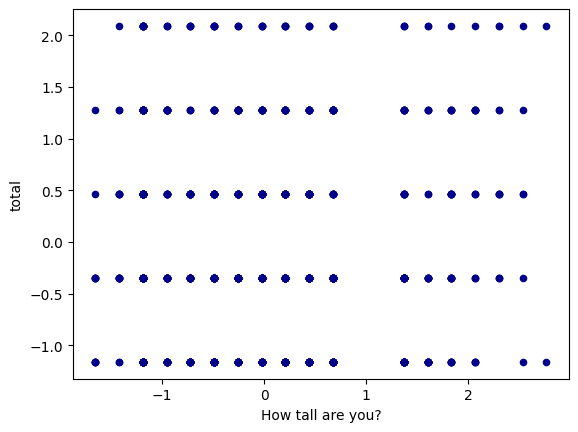

In [399]:
df_q1 = df[[df.columns[0], df.columns[3], df.columns[11], df.columns[12], df.columns[13]]].copy()
df_q1['total'] = df_q1.loc[:,[df_q1.columns[2], df_q1.columns[3], df_q1.columns[4]]].sum(axis=1)
df_q1_standardized = (df_q1-df_q1.mean())/df_q1.std()
scatter_q1 = df_q1_standardized.plot.scatter(x='How tall are you?', y='total', c='DarkBlue')

In [400]:
print(f'Correlation: {corr(df_q1_standardized[df_q1_standardized.columns[1]].values.tolist(), df_q1[df_q1_standardized.columns[2]].values.tolist())}')

Correlation: -0.002608292345074733


As shown in the scatter plot, there is no trend at all between the two. Therefore, the answer is **no, taller people do not find reclining seats to be more rude than shorter people.**
This contradicts my hypothesis, as taller people tend to have less leg room.

### **2. Does a higher education correlate to more frequent flying?**

For this one, we also need a way to scale the education values. Lets see what the potential values are:

In [411]:
edu = df.groupby(['Education'])
edu.size()

Education
Bachelor degree                     278
Graduate degree                     264
High school degree                   61
Less than high school degree          5
No Response                          12
Some college or Associate degree    225
dtype: int64

As you can see, these are pretty easy to scale by "how much education do you have?" That is, less than high school will be 0, and a graduate degree will be 4. Because this is specific to this question, I've chosen to modify it here rather than the original table. This is because the demographics are a common selection of the rows for simplicity, and education is part of the rows I select.

In [405]:
df_q3 = df[[df.columns[1], df.columns[25]]].copy()
to_num = df_q3[df_q3.columns[1]].replace({
    'No Response': 0,
    'Less than high school degree': 0,
    'High school degree': 1,
    'Some college or Associate degree': 2,
    'Bachelor degree': 3,
    'Graduate degree': 4
})
df_q3[df_q3.columns[1]] = to_num
df_q3.head(10)

,How often do you travel by plane?,Education
1,1,4
2,1,3
3,1,3
4,2,3
5,1,4
6,2,2
7,1,3
9,1,3
10,2,1
15,1,2


Then, similar to the last two questions:

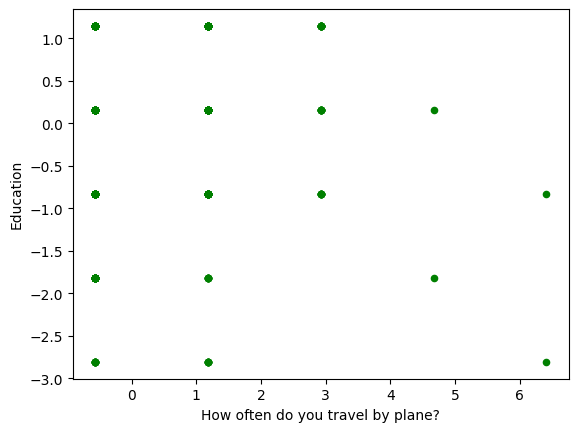

In [406]:
df_q3_standardized = (df_q3-df_q3.mean())/df_q3.std()
scatter_q3 = df_q3_standardized.plot.scatter(x='How often do you travel by plane?', y='Education', c='Green')

This scatter plot seems to have very low correlation. We can prove it with our function.

In [407]:
print(f'Correlation: {corr(df_q3[df_q3.columns[0]].values.tolist(), df_q3[df_q3.columns[1]].values.tolist())}')

Correlation: 0.08355729629249639


### 3. Are mothers with children under 18 more sympathetic to families flying on board?

For this question, instead of a scatterplot approach, I'm going to compare their average to the full party average.

First, we need our mothers. For this, we need every participant who answered yes to Q4 and gender marked Female. From there, they will answer to the average of Q15, Q18, and Q19.

Q4: Do you have any children under 18?

Q15: Is it rude to ask someone to switch seats with you in order to be closer to family?

Q18: In general, is it rude to bring a baby on a plane?

Q19: In general, is it rude to knowingly bring unruly children on a plane?

In [408]:
mothers = df.loc[(df['Do you have any children under 18?'] == 1) & (df['Gender'] == "Female")].copy()
mothers['family_total'] = mothers.loc[:,[mothers.columns[15], mothers.columns[18], mothers.columns[19]]].sum(axis=1)
mothers_compare = df.copy()
mothers_compare['family_total'] = mothers_compare.loc[:,[mothers_compare.columns[15], mothers_compare.columns[18], mothers_compare.columns[19]]].sum(axis=1)
mothers.head(10)[[mothers.columns[4], 'Gender','Age','Household Income','Education', 'Location (Census Region)', 'family_total']]

,Do you have any children under 18?,Gender,Age,Household Income,Education,Location (Census Region),family_total
185,1,Female,30-44,"$0 - $24,999",Graduate degree,South Atlantic,0
187,1,Female,30-44,"$100,000 - $149,999",Bachelor degree,South Atlantic,1
192,1,Female,30-44,No Response,No Response,Pacific,6
194,1,Female,30-44,"$50,000 - $99,999",Some college or Associate degree,West North Central,0
196,1,Female,30-44,"$0 - $24,999",Graduate degree,Middle Atlantic,0
213,1,Female,> 60,No Response,Graduate degree,Pacific,2
214,1,Female,30-44,"$50,000 - $99,999",Bachelor degree,West North Central,2
230,1,Female,30-44,"$0 - $24,999",Some college or Associate degree,South Atlantic,1
248,1,Female,> 60,"$50,000 - $99,999",Graduate degree,Mountain,0
249,1,Female,30-44,"$50,000 - $99,999",Graduate degree,Pacific,1


In [441]:
print(f"Mothers only: {round(mothers['family_total'].mean(), 2)}, All: {round(mothers_compare['family_total'].mean(),2)}")

Mothers only: 1.19, All: 1.82


As shown, the answer is **yes, mothers tend to be more sympathetic towards families flying on board** on average. This is because while the isolated mean is 1.19, the average mean is 1.82 when it comes to family/children-related questions.

### **4. Are frequent fliers more tolerant to rudeness? Or, do they consider more things rude than non-frequent fliers?**

For this question, I will only be using two columns:

Q1: How often do you travel by plane?

Q27: Total "rudeness" level

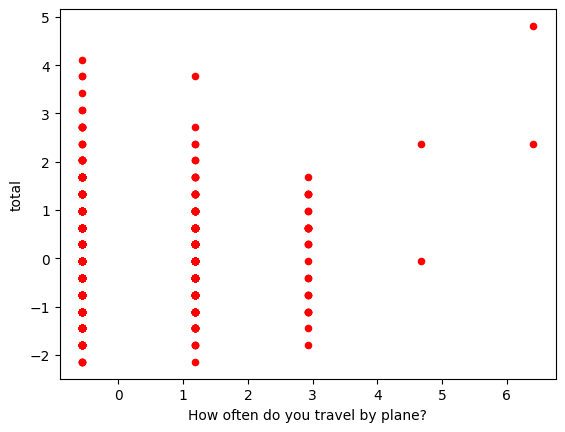

In [401]:
df_q2 = df[[df.columns[1], df.columns[27]]].copy()
df_q2_standardized = (df_q2-df_q2.mean())/df_q2.std()
scatter_q2 = df_q2_standardized.plot.scatter(x='How often do you travel by plane?', y='total', c='Red')

These results are interesting. Where the first scales have a downward frequency, showing that more frequent fliers might be more tolerant, it is also a "daily" flyer who has the highest score.

In [402]:
df[df[df.columns[1]] == 5][['RespondentID',df.columns[1], 'Gender','Age','Household Income','Education', 'Location (Census Region)', 'total']]

,RespondentID,How often do you travel by plane?,Gender,Age,Household Income,Education,Location (Census Region),total
34,3434013636,5,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific,16
192,3433254127,5,Female,30-44,No Response,No Response,Pacific,23


Remember that the 23 total is the maximum we saw before. In this case, she is definitely an outlier and can be disregarded. Therefore, the downward trend is plausible. Unfortunately, this survey did not seem to have an even spread of frequency, so we can only guess what the answer is.

In [403]:
print(f'Correlation with outlier: {corr(df_q2[df_q2.columns[0]].values.tolist(), df_q2[df_q2.columns[1]].values.tolist())}')
df_q2_mod = df_q2.drop(192)
print(f'Correlation without outlier: {corr(df_q2_mod[df_q2_mod.columns[0]].values.tolist(), df_q2_mod[df_q2_mod.columns[1]].values.tolist())}')

Correlation with outlier: 0.07088631780285248
Correlation without outlier: 0.035656366107813614


These correlations are both, frankly, very low. So, these two columns are probably not correlated.

###5. Are younger people more likely to recline their seat?

For this one, I'm going to use the group and mean function to show the different ages. The groups will be by age, and then the means will be the average response on Q2: "Do you ever recline your seat when you fly?"

In [442]:
df1 = df.query("Age != 'No Response'")
age = df1.groupby(['Age'])
age['Do you ever recline your seat when you fly?'].mean()

Age
18-29    1.526316
30-44    1.927602
45-60    1.970085
> 60     1.812207
Name: Do you ever recline your seat when you fly?, dtype: float64

As you can see, those of age group 18-29 are actually **less** likely to recline their seat.

### 6. Are men more likely to not listen to a flight attendants direction?
Similar to the previous question, we are looking at the averages been genders Male and Female for Q20 and Q21.

Q20: Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?

Q21: Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?

I have chosen both of these questions because they are questions that are in response to direct instructions given by the airline pilot. Not only is it rude, it is actively countering expectation.

In [435]:
df_q6 = df.query("Gender != 'No Response'").copy()
df_q6['rules_total'] = df_q6.loc[:,[df_q6.columns[20], df_q6.columns[21]]].sum(axis=1)
gen = df_q6.groupby(['Gender'])
gen['rules_total'].mean()

Gender
Female    0.136364
Male      0.208020
Name: rules_total, dtype: float64

This shows that **yes, men are more likely to not listen to a flight attendants direction** on average. This is an interesting question to me, because flight attendants tend to be female. This higher average can be explained by misogyny, a sense of superiority, or simply just random chance.

The six questions above are just examples of the possibilities in this dataset. Although small, this dataset still has enough survey respondents to return valid information such as averages and scatter plots.  